In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$\\log_2(N!)$')

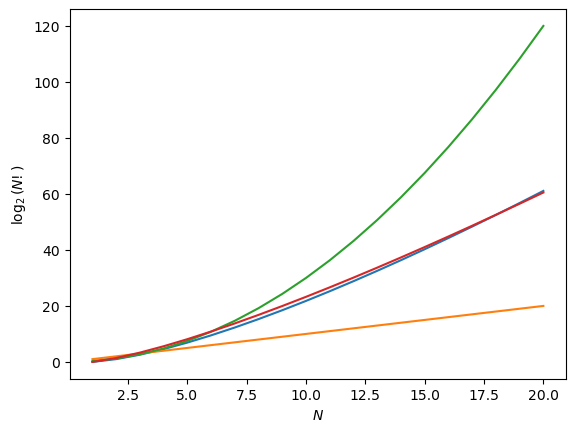

In [20]:
def fac(N):
    res = 1
    for i in range(1, N+1):
        res *= i
    return res

Ns = np.arange(1, 21)
plt.plot(Ns, [np.log2(fac(n)) for n in Ns])
plt.plot(Ns, Ns)
plt.plot(Ns, 0.3*Ns**2)
plt.plot(Ns, 0.7*Ns*np.log2(Ns))
plt.xlabel("$N$")
plt.ylabel("$\\log_2(N!)$")

In [9]:
np.log2(fac(5))

6.906890595608519

Upshot: $\log_2(N!) \text{ is } \Omega(N log N)$

# Counting Sort

In [12]:
np.random.seed(271)
arr = np.random.randint(0, 20, 100).tolist()
arr.append(1000000)
print(arr)

[9, 1, 0, 9, 8, 19, 4, 6, 1, 14, 2, 6, 17, 2, 10, 8, 6, 6, 6, 2, 10, 18, 2, 3, 5, 11, 5, 18, 4, 8, 14, 2, 11, 1, 17, 7, 9, 2, 0, 16, 15, 13, 17, 9, 7, 12, 8, 11, 2, 10, 1, 12, 18, 17, 7, 17, 8, 4, 15, 10, 13, 8, 3, 1, 17, 3, 9, 19, 3, 18, 8, 9, 0, 2, 1, 14, 15, 6, 7, 6, 14, 5, 8, 1, 5, 14, 12, 12, 1, 3, 15, 2, 10, 1, 13, 16, 4, 19, 7, 3, 1000000]


In [15]:
# I know that my elements are between 0 and 19
counts = []
for i in range(1000001): # How many of each number there are
    counts.append(0)
for x in arr: # N time
    counts[x] += 1
# Loop through the counts, and repeat each number the appropriate number
# of times
for i in range(len(counts)): # N + K time
    # Print out each number as many time as I counted it
    print(("{} ".format(i))*counts[i], end='')

0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 6 6 6 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 11 11 11 12 12 12 12 13 13 13 14 14 14 14 14 15 15 15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 1000000 

In [16]:
print(*sorted(arr))

0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 6 6 6 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 11 11 11 12 12 12 12 13 13 13 14 14 14 14 14 15 15 15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 1000000


* N: The number of elements we're sorting
* K: The range of the numbers

$O(N + K)$

This is great if $K << N$, but terrible if $K >> N$

# LSD (Least Significant Digit) Radix Sort

Sort my numbers by what they have in the 1's place, then what they have in the 10's place, then what they have in the 100's place, etc, using counting sort.  This works because counting sort is *stable*, so it preserves the work we've done in the lower places when the upper places tie.  Below is code:

In [20]:
def get_value_at_place(x, B, p):
    """
    x: number
    B: Base
    p: Place
    """
    return (x % (B**p)) // B**(p-1)

x = 271
B = 10
for p in range(1, 4):
    print(get_value_at_place(x, B, p))

1
7
2


In [27]:
def count_sort(arr, B=10):
    """
    arr: Array to sort
    B: Base we're using
    """
    R = np.max(arr)
    for p in range(1, 2+int(np.ceil(np.log(R)/np.log(B)))):
        counts = []
        for i in range(B): # Use as many buckets as there are unique digits
            counts.append([])
        for x in arr: # N time
            counts[get_value_at_place(x, B, p)].append(x)
        # Loop through the counts, and repeat each number the appropriate number
        # of times
        arr = []
        for elems in counts: # N + B time
            arr += elems
        print(B**(p-1), "place")
        print(arr, "\n")
    return arr


np.random.seed(271)
arr = np.random.randint(0, 10000, 20)

print(count_sort(arr))

1 place
[200, 8580, 9230, 5890, 201, 9241, 4312, 1272, 8952, 6182, 9682, 9883, 4714, 1395, 5826, 4376, 2566, 9986, 3417, 3078] 

10 place
[200, 201, 4312, 4714, 3417, 5826, 9230, 9241, 8952, 2566, 1272, 4376, 3078, 8580, 6182, 9682, 9883, 9986, 5890, 1395] 

100 place
[3078, 6182, 200, 201, 9230, 9241, 1272, 4312, 4376, 1395, 3417, 2566, 8580, 9682, 4714, 5826, 9883, 5890, 8952, 9986] 

1000 place
[200, 201, 1272, 1395, 2566, 3078, 3417, 4312, 4376, 4714, 5826, 5890, 6182, 8580, 8952, 9230, 9241, 9682, 9883, 9986] 

10000 place
[200, 201, 1272, 1395, 2566, 3078, 3417, 4312, 4376, 4714, 5826, 5890, 6182, 8580, 8952, 9230, 9241, 9682, 9883, 9986] 

[200, 201, 1272, 1395, 2566, 3078, 3417, 4312, 4376, 4714, 5826, 5890, 6182, 8580, 8952, 9230, 9241, 9682, 9883, 9986]
